# Overview of the Data

In [8]:
import pandas as pd
import sqlite3

conn = sqlite3.connect('factbook.db')
cursor = conn.cursor()
q = "SELECT * FROM sqlite_master WHERE type='table';"
cursor.execute(q).fetchall()

[('table',
  'facts',
  'facts',
  2,
  'CREATE TABLE "facts" ("id" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, "code" varchar(255) NOT NULL, "name" varchar(255) NOT NULL, "area" integer, "area_land" integer, "area_water" integer, "population" integer, "population_growth" float, "birth_rate" float, "death_rate" float, "migration_rate" float, "created_at" datetime, "updated_at" datetime)'),
 ('table',
  'sqlite_sequence',
  'sqlite_sequence',
  3,
  'CREATE TABLE sqlite_sequence(name,seq)')]

In [9]:
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,facts,facts,2,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."
1,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"


In [10]:
q2 = 'select * from facts limit 5'
pd.read_sql_query(q2, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51,2015-11-01 13:19:49.461734,2015-11-01 13:19:49.461734
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30,2015-11-01 13:19:54.431082,2015-11-01 13:19:54.431082
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92,2015-11-01 13:19:59.961286,2015-11-01 13:19:59.961286
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00,2015-11-01 13:20:03.659945,2015-11-01 13:20:03.659945
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46,2015-11-01 13:20:08.625072,2015-11-01 13:20:08.625072


# Summary Statistics

In [11]:
q3 = '''
select min(population) min_pop, max(population) max_pop,
min(population_growth) min_pop_growth, max(population_growth) max_pop_growth
from facts
'''
pd.read_sql_query(q3, conn)

,min_pop,max_pop,min_pop_growth,max_pop_growth
0,0,7256490011,0.0,4.02


# Outliers

In [12]:
q4 = '''
select * from facts
where population == (select min(population) from facts)
'''
# population == 0해도 같은 결과이긴 함

pd.read_sql_query(q4, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,250,ay,Antarctica,None,280000,None,0,None,None,None,None,2015-11-01 13:38:44.885746,2015-11-01 13:38:44.885746


In [13]:
q5 = '''
select * from facts
where population == (select max(population) from facts)
'''
pd.read_sql_query(q5, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate,created_at,updated_at
0,261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None,2015-11-01 13:39:09.910721,2015-11-01 13:39:09.910721


The result we've got for the minimum population makes sense because it was from Antartica. In addition, the maximum population comes from the total world population.

# Visualization

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2881: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000084FD154780>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x00000084FD44D7F0>]], dtype=object)

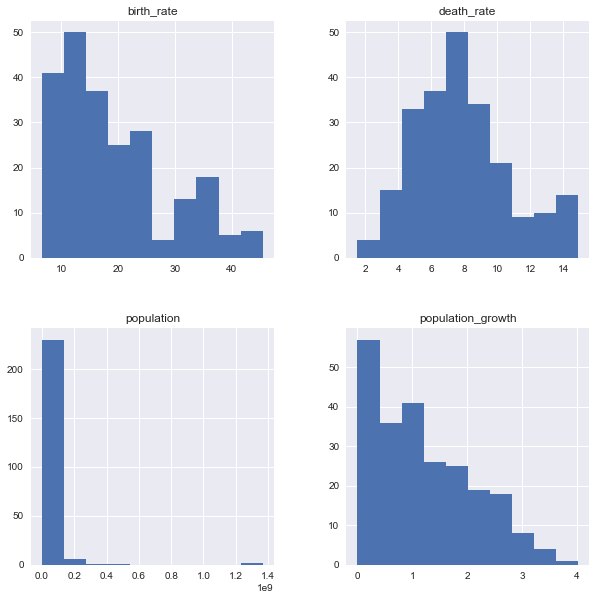

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

q6 = '''
select population, population_growth, birth_rate, death_rate
from facts
where population != (select min(population) from facts)
and population != (select max(population) from facts)
'''
pd.read_sql_query(q6, conn).hist(ax=ax)

# Population Density

In [39]:
q7 = '''
select name, CAST(population as float) / CAST(area_land as float) density
from facts
order by density desc
limit 20
'''

pd.read_sql_query(q7,conn)

,name,density
0,Macau,21168.964286
1,Monaco,15267.500000
2,Singapore,8259.784571
3,Hong Kong,6655.271202
4,Gaza Strip,5191.819444
5,Gibraltar,4876.333333
6,Bahrain,1771.859211
7,Maldives,1319.640940
8,Malta,1310.015823
9,Bermuda,1299.925926


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000084FD7FFE80>]], dtype=object)

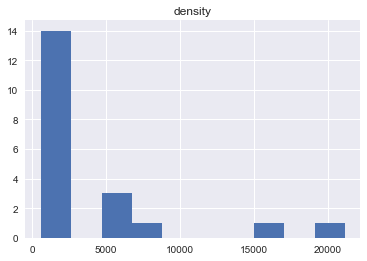

In [40]:
pd.read_sql_query(q7,conn).hist()

# Water to Land Ratio

In [45]:
q8 = '''
select name, cast(area_water as float) / cast(area_land as float) water_to_land_ratio from facts
order by water_to_land_ratio desc
limit 20
'''
pd.read_sql_query(q8,conn)

,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
3,"Bahamas, The",0.386613
4,Guinea-Bissau,0.284673
5,Malawi,0.259396
6,Netherlands,0.225710
7,Uganda,0.222922
8,Eritrea,0.164356
9,Liberia,0.156240


In [46]:
q9 = '''
select name, cast(area_water as float) / cast(area_land as float) water_to_land_ratio from facts
where water_to_land_ratio > 0.5
order by water_to_land_ratio desc
'''
pd.read_sql_query(q9,conn)

,name,water_to_land_ratio
0,British Indian Ocean Territory,905.666667
1,Virgin Islands,4.520231
2,Puerto Rico,0.554791
